In [2]:
!pip install pandas numpy matplotlib seaborn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e1/0c/ad295fd74bfac85358fd579e271cded3ac969de81f62dd0142c426b9da91/pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/ca/fa/d2c5575d9c734a7376cc1592fae50257ec95d061b27ee3dbdb0b3b551eb2/numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7a/81/dae7e14042e74da658c3336ab9799128e09a1ee03964f2d89630b5d12106/matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.met

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [6]:
grocery_data=pd.read_csv('Grocery_Inventory_and_Sales_Dataset.csv')

In [7]:
grocery_data.shape

(990, 16)

In [8]:
grocery_data.head()

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,$4.50,8/16/2024,6/29/2024,9/19/2024,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,$20.00,11/1/2024,5/29/2024,5/8/2024,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,$6.00,8/3/2024,6/10/2024,9/22/2024,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,$1.50,12/8/2024,2/19/2025,4/17/2024,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,$4.00,7/3/2024,10/11/2024,10/5/2024,15068 Scoville Court,62,25,Backordered


In [9]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               990 non-null    object
 1   Product_Name             990 non-null    object
 2   Catagory                 989 non-null    object
 3   Supplier_ID              990 non-null    object
 4   Supplier_Name            990 non-null    object
 5   Stock_Quantity           990 non-null    int64 
 6   Reorder_Level            990 non-null    int64 
 7   Reorder_Quantity         990 non-null    int64 
 8   Unit_Price               990 non-null    object
 9   Date_Received            990 non-null    object
 10  Last_Order_Date          990 non-null    object
 11  Expiration_Date          990 non-null    object
 12  Warehouse_Location       990 non-null    object
 13  Sales_Volume             990 non-null    int64 
 14  Inventory_Turnover_Rate  990 non-null    i

In [10]:
grocery_data.describe()

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Sales_Volume,Inventory_Turnover_Rate
count,990.000000,990.000000,990.000000,990.000000,990.000000
mean,55.609091,51.215152,51.913131,58.925253,50.150505
std,26.300775,29.095241,29.521059,23.002318,28.798954
min,10.000000,1.000000,1.000000,20.000000,1.000000
25%,33.000000,25.250000,25.000000,39.000000,25.000000
50%,56.000000,53.000000,54.000000,58.000000,50.000000
75%,79.000000,77.000000,77.000000,78.000000,74.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
grocery_data.isnull().sum()

Product_ID                 0
Product_Name               0
Catagory                   1
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64

In [15]:
from datetime import datetime

In [22]:
import pandas as pd

date_columns = ['Date_Received', 'Last_Order_Date', 'Expiration_Date']

for col in date_columns:
    try:
        grocery_data[col] = pd.to_datetime(grocery_data[col], errors='coerce')
        print(f"Converted {col} to datetime")
    except Exception as e:
        print(f"Error converting {col}: {e}")

Converted Date_Received to datetime
Converted Last_Order_Date to datetime
Converted Expiration_Date to datetime


In [25]:
grocery_data['Unit_Price'] = grocery_data['Unit_Price'].replace('[\$,]', '', regex=True)
grocery_data['Unit_Price'] = pd.to_numeric(grocery_data['Unit_Price'], errors='coerce')

print("Unit_Price conversion complete.")

Unit_Price conversion complete.


In [26]:
grocery_data.dtypes

Product_ID                         object
Product_Name                       object
Catagory                           object
Supplier_ID                        object
Supplier_Name                      object
Stock_Quantity                      int64
Reorder_Level                       int64
Reorder_Quantity                    int64
Unit_Price                        float64
Date_Received              datetime64[ns]
Last_Order_Date            datetime64[ns]
Expiration_Date            datetime64[ns]
Warehouse_Location                 object
Sales_Volume                        int64
Inventory_Turnover_Rate             int64
Status                             object
dtype: object

In [27]:
grocery_data.isnull().sum()

Product_ID                 0
Product_Name               0
Catagory                   1
Supplier_ID                0
Supplier_Name              0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Warehouse_Location         0
Sales_Volume               0
Inventory_Turnover_Rate    0
Status                     0
dtype: int64

In [28]:
grocery_data.head()

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,4.5,2024-08-16,2024-06-29,2024-09-19,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,20.0,2024-11-01,2024-05-29,2024-05-08,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,6.0,2024-08-03,2024-06-10,2024-09-22,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,1.5,2024-12-08,2025-02-19,2024-04-17,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,4.0,2024-07-03,2024-10-11,2024-10-05,15068 Scoville Court,62,25,Backordered


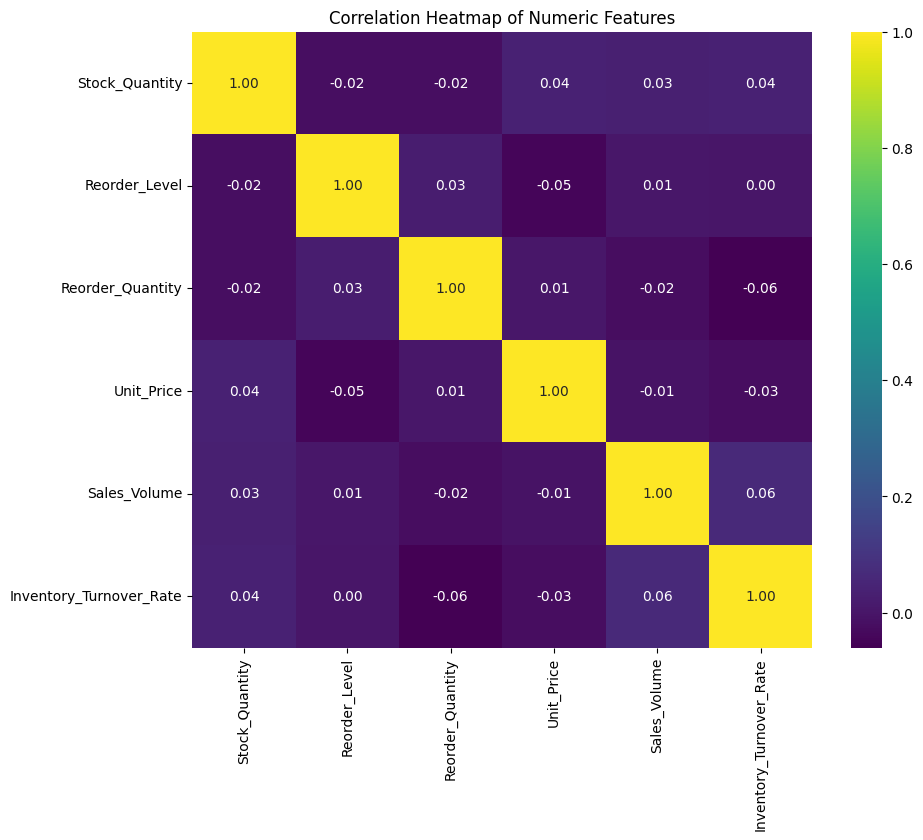

In [29]:
numeric_df = grocery_data.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")


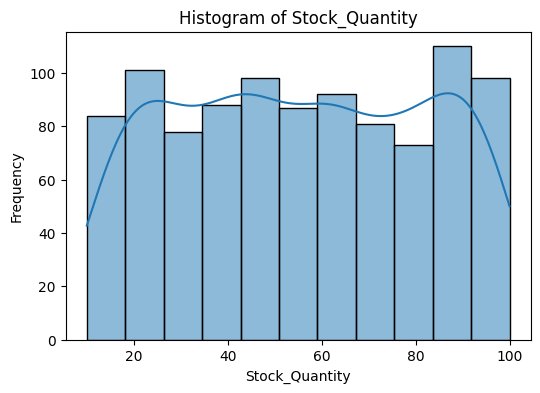

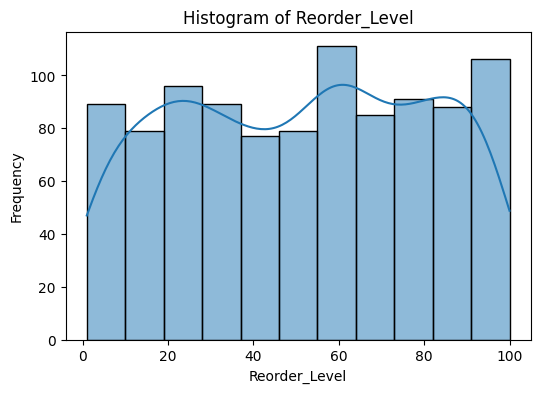

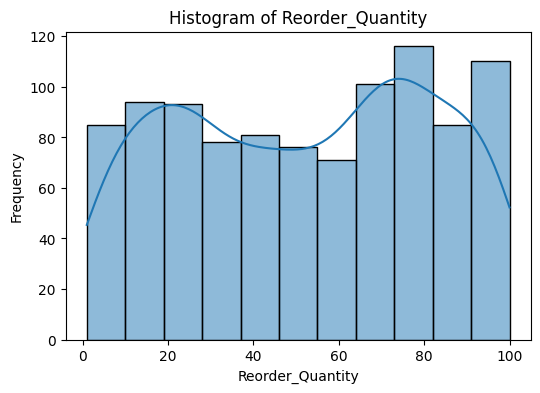

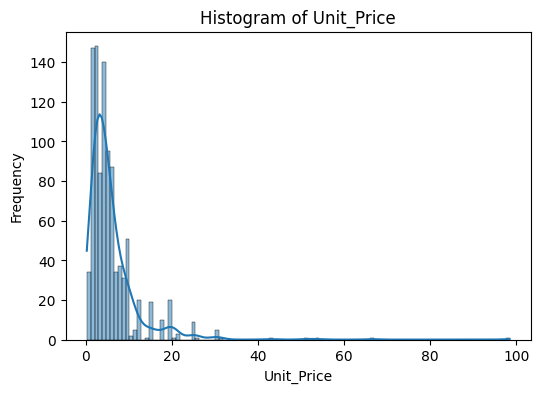

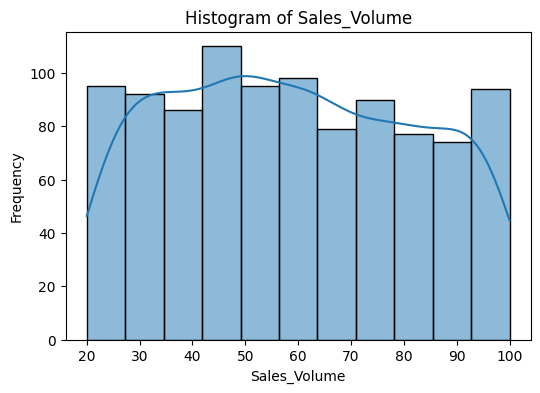

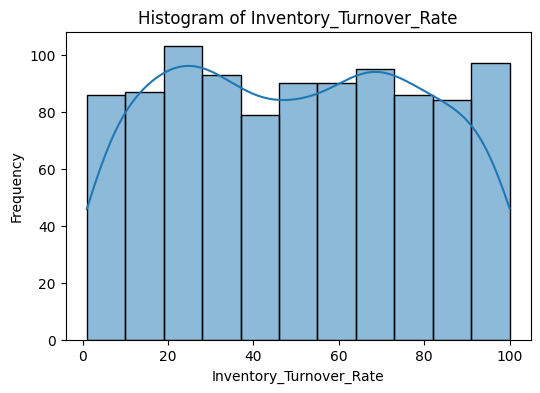

In [33]:
for col in numeric_df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

AttributeError: module 'seaborn' has no attribute 'subtitle'

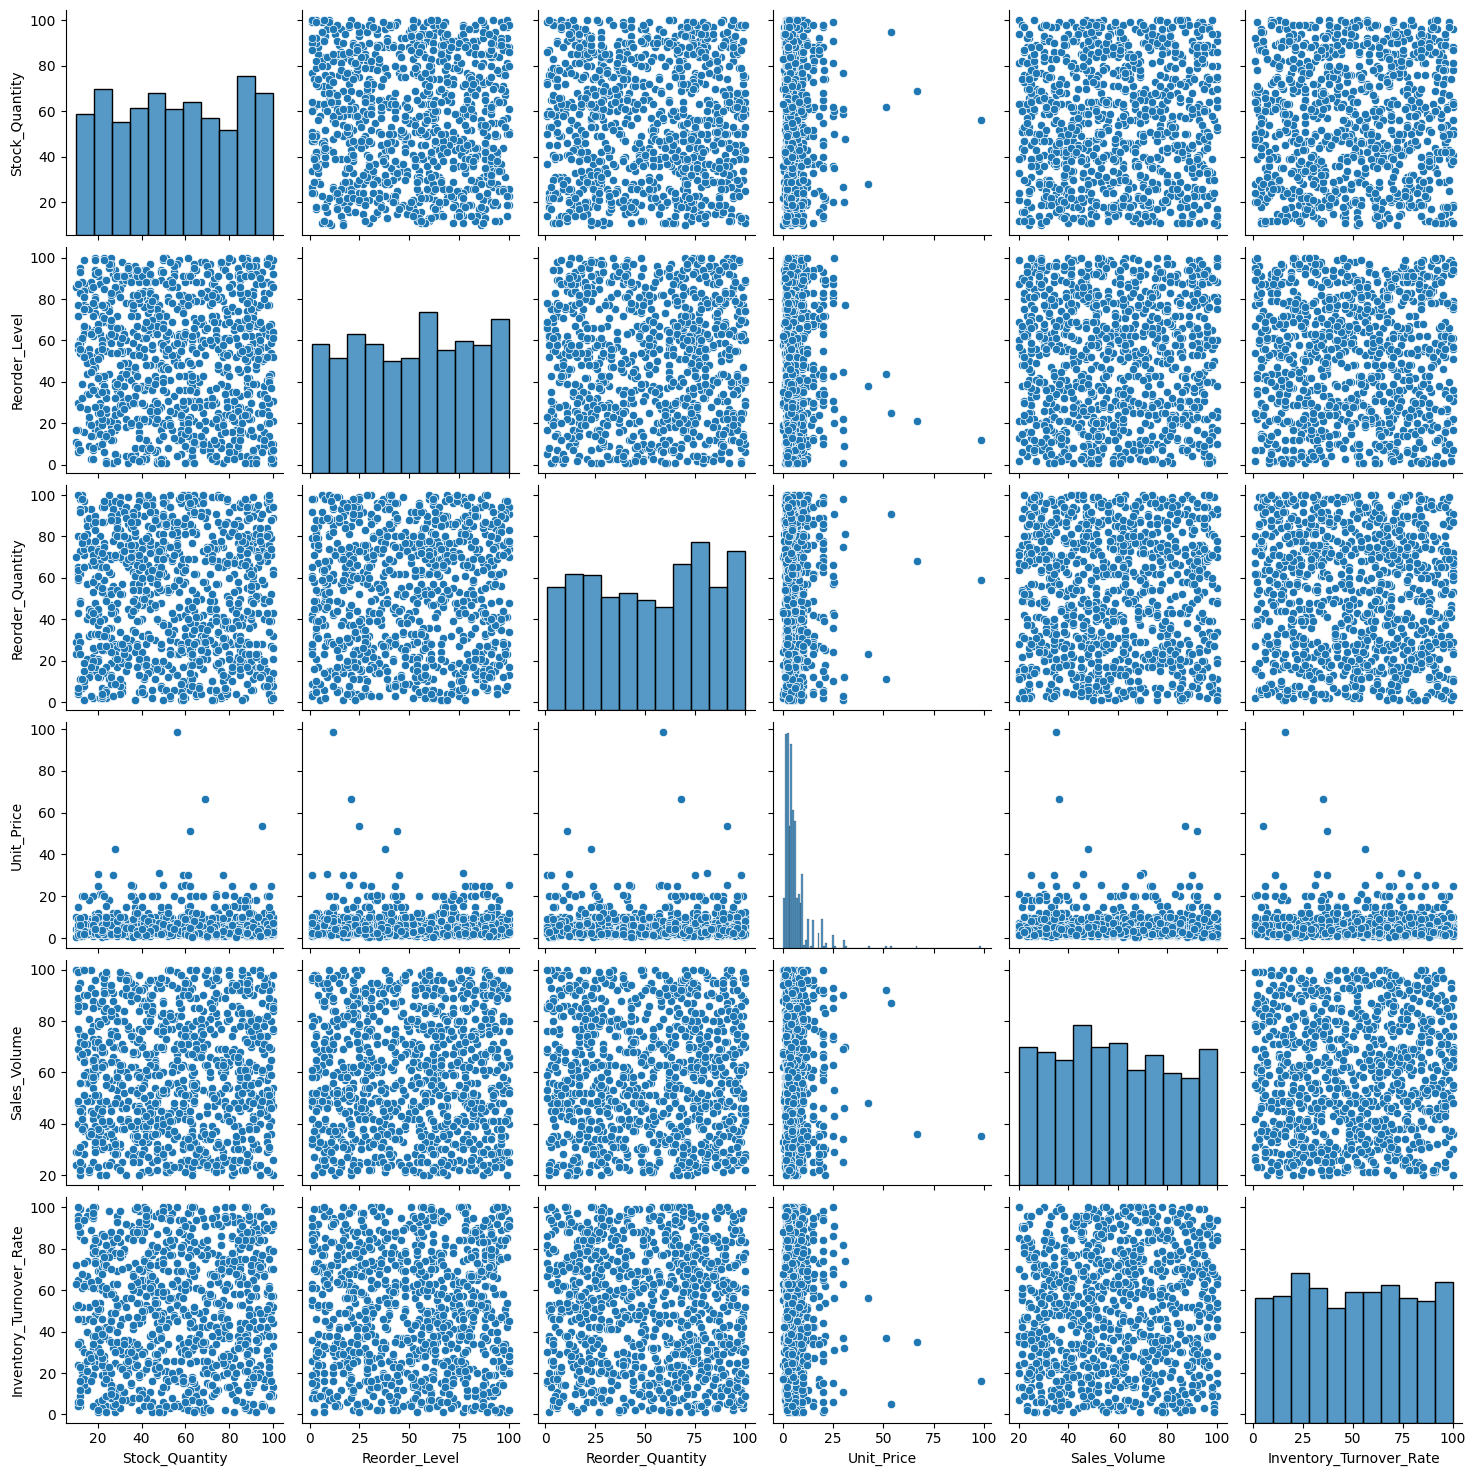

In [36]:
sns.pairplot(numeric_df)
sns.subtitle('Pairplot of Numeric Features', y=1.02)
plt.show()

In [41]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/c4/b7/2e35f8e289ab70108f8cbb2e7a2208f0575dc704749721286519dcf35f6f/scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/a4/98/e5c964526c929ef1f795d4c343b2ff98634ad2051bd2bbadfef9e772e413/scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
features = ['Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Inventory_Turnover_Rate']

# Checking if these features are present in the dataframe
for feat in features:
    if feat not in grocery_data.columns:
        print(f"Warning: {feat} is not found in the dataframe")

In [45]:
# Drop rows with missing values in the selected features or target
df_prediction = grocery_data[features + ['Sales_Volume']].dropna()

X = df_prediction[features]
y = df_prediction['Sales_Volume']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
rf_reg=RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
re_pred=rf_reg.predict(X_test)

In [49]:
# Evaluate the model using R2 score and Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, re_pred)
rmse = np.sqrt(mean_squared_error(y_test, re_pred))

In [50]:

print(f"Random Forest Regressor R2 Score: {r2:.4f}")
print(f"Random Forest Regressor RMSE: {rmse:.4f}")


Random Forest Regressor R2 Score: -0.0752
Random Forest Regressor RMSE: 24.6034


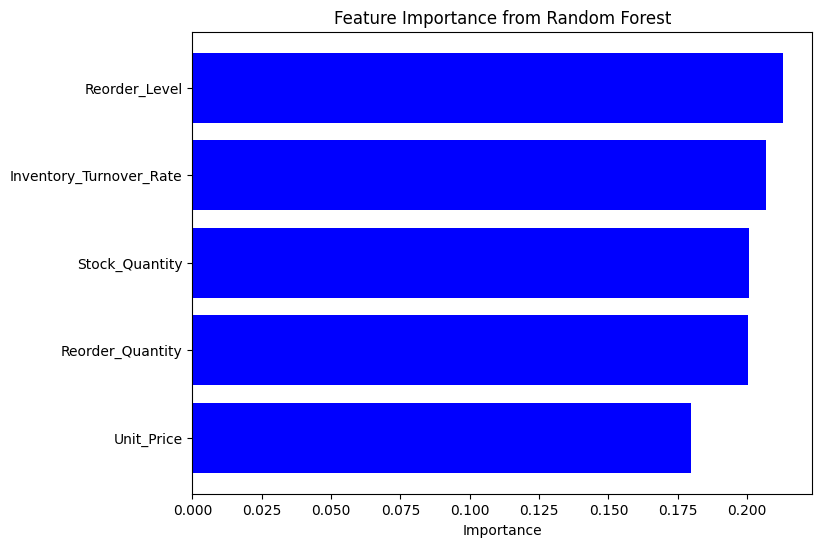

In [51]:
# Visualizing Feature Importance via Permutation Importance-like bar chart
importances = rf_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()
